In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [0]:
import sys
ROOT_PATH = '/content/drive/My Drive/NLP/project/code/'
ROOT_PATH = '/content/drive/My Drive/university/projects/NLP/project/code/'
sys.path.append(ROOT_PATH)

In [4]:
ROOT_PATH_DATA = f"{ROOT_PATH}data/preprocessed/ny_guardian_kaggle/"
ROOT_PATH_ORIGIN_DATA = f'{ROOT_PATH}data/ny_guardian_kaggle/original/'
path_data_tokenized = Path(f"{ROOT_PATH_DATA}combined_data_tokenized.csv")

NameError: ignored

In [5]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from pathlib import Path
!pip install empath
from utils.preprocessing import *
from utils.data_utils import *
from IPython.display import display

     |████████████████████████████████| 61kB 1.0MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57824 sha256=f54b54fe48fa04c53867f180f5647d9ca4ab1f7f34952408a7c748456e268f9e
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Create base data

Add class and source

In [0]:
def preprocessing_cloumns():
  df_fake = pd.read_csv(f"{ROOT_PATH_ORIGIN_DATA}/fake.csv")
  df_fake.rename(columns={"published": "date"},inplace=True)
  df_fake['source'] = "kaggle"
  df_fake['class']=1
  df_fake.to_csv(f"{ROOT_PATH_ORIGIN_DATA}/fake.csv",index=False)
  df_ny = pd.read_csv(f"{ROOT_PATH_ORIGIN_DATA}/nyt_unclean.csv")
  df_ny['source']="ny"
  df_ny['class']=0
  df_ny.to_csv(f"{ROOT_PATH_ORIGIN_DATA}/nyt_unclean.csv",index=False)
  df_guardian = pd.read_csv(f"{ROOT_PATH_ORIGIN_DATA}/GuardianUncleaned.csv")
  df_guardian['source']="df_guardian"
  df_guardian['class']=0
  df_guardian.to_csv(f"{ROOT_PATH_ORIGIN_DATA}/GuardianUncleaned.csv",index=False)

combined all dataset

In [0]:
def create_combined_data():
  path_data = Path(f"{ROOT_PATH_DATA}combined_data.csv")
  if not path_data.exists():
    filenames = [i for i in glob.glob(f"{ROOT_PATH_ORIGIN_DATA}/*.csv")]
    combined_csv = pd.concat([pd.read_csv(f, usecols=["text","title","date","source","class"]) for f in filenames])
    combined_csv.rename(columns={'class':'label'},inplace=True)
    print (f"Total rows with NA in Text column: {combined_csv[combined_csv.text.isna()].shape[0]}")
    combined_csv = combined_csv[combined_csv["text"].notna()]
    combined_csv.to_csv(f"{ROOT_PATH_DATA}combined_data.csv", index=False)
    combined_csv.sample(frac=0.5).to_csv(f"{ROOT_PATH_DATA}combined_data_sample.csv", index=False)
  else:
    combined_csv = pd.read_csv(f"{ROOT_PATH_DATA}combined_data.csv")
  return combined_csv

In [0]:
preprocessing_cloumns()

In [0]:
combined_csv = create_combined_data()

In [0]:
display(combined_csv)
display(combined_csv.info())

,label,date,source,text,title
0,1,2016-10-26T21:41:00.000+03:00,kaggle,Print They should pay all the back all the mon...,Muslims BUSTED: They Stole Millions In Gov’t B...
1,1,2016-10-29T08:47:11.259+03:00,kaggle,Why Did Attorney General Loretta Lynch Plead T...,Re: Why Did Attorney General Loretta Lynch Ple...
2,1,2016-10-31T01:41:49.479+02:00,kaggle,Red State : \nFox News Sunday reported this mo...,BREAKING: Weiner Cooperating With FBI On Hilla...
3,1,2016-11-01T05:22:00.000+02:00,kaggle,Email Kayla Mueller was a prisoner and torture...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...
4,1,2016-11-01T21:56:00.000+02:00,kaggle,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...
...,...,...,...,...,...
43888,0,2016-11-26T03:10:05Z,df_guardian,A group of distinguished former newspaper edit...,New Zealand media merger risks growth of 'glib...
43889,0,2016-11-25T17:03:28Z,df_guardian,Jill Stein has requested a full recount of the...,"Jill Stein requests Wisconsin recount, allegin..."
43890,0,2016-11-26T00:01:16Z,df_guardian,The NHS is set to overhaul services for women ...,NHS to create specialist centres for childbirt...
43891,0,2016-11-26T00:00:16Z,df_guardian,A full field of 18 is due to go to post for th...,Talking Horses: Saturday's best bets for Newbu...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43893 entries, 0 to 43892
Data columns (total 5 columns):
label     43893 non-null int64
date      43893 non-null object
source    43893 non-null object
text      43893 non-null object
title     43213 non-null object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


None

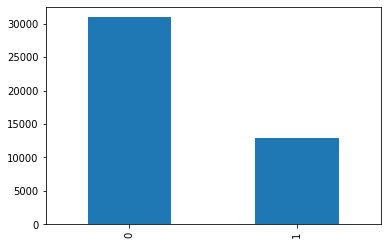

In [0]:
combined_csv['label'].value_counts().plot.bar()

# Add Feaures

In [0]:
combined_csv['text_tokenized'] = combined_csv['text'].apply(text_to_wordlist)
combined_csv.to_csv(path_data_tokenized, index=False)

Streaming output truncated to the last 5000 lines.
[nltk_data]     not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading SnowballStemmer: Package 'SnowballStemmer'
[nltk_data]     not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading SnowballStemmer: Package 'SnowballStemmer'
[nltk_data]     not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading SnowballStemmer: Package 'SnowballStemmer'
[nltk_data]     not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading SnowballStemmer: Package 'SnowballStemmer'
[nltk_data]     not found in index
[nltk_data] Downloadin

In [0]:
combined_csv['text_tokenized'].isna().sum()

0

In [0]:
combined_csv[["article_length", "total_sentences", "avg_sent_length", "word_count", "number_count",
"avg_word_length", "count_pos_adj", "count_pos_sl", "count_exclamation",
"count_date", "allCapsCount"]] =\
    combined_csv.apply(lexical_features_extraction, result_type='expand', axis=1)
int_colunms = ['article_length', 'total_sentences', 'word_count','number_count', 'count_pos_adj', 'count_pos_sl','count_exclamation', 'count_date', 'allCapsCount']
combined_csv[int_colunms] = combined_csv[int_colunms].astype('int32')
combined_csv.to_csv(path_data_tokenized, index=False)

# Sentiment + Categories Features:

In [0]:
categories_cols_names = ['catLaw','catCommunication', 'catCrime', 'catPayment',
                    'catPhone', 'catBanking', 'catWar', 'catEconomics', 
                    'catPolitics', 'catLeader', 'catSocialMedia', 'catSchool',
                    'catGovernment', 'catMoney', 'catWork', 'catSpeaking', 
                    'catInternet', 'catBusiness']

categories_names = ('law','communication', 'crime', 'payment', 'phone', 
                         'banking', 'war', 'economics', 'politics', 'leader', 
                         'social_media', 'school','government', 'money', 'work',
                         'speaking', 'internet', 'business')

sentiment_cols_names = ['sentNeg', 'sentNeutral', 'sentPos', 'sentCompound']
combined_csv = pd.read_csv(f"{ROOT_PATH_DATA}combined_data_tokenized.csv")
combined_csv.head()

In [0]:
combined_csv[categories_cols_names] = combined_csv.apply(lambda row: categories_extraction(row.text), axis=1, result_type='expand')
combined_csv.to_csv(path_data_tokenized, index=False)

In [0]:
 combined_csv[sentiment_cols_names] = combined_csv.apply(lambda row: sentiment_extraction(row.text), axis=1, result_type='expand')
 combined_csv.to_csv(path_data_tokenized, index=False)

In [0]:
combined_csv = combined_csv.drop(columns=['categories', 'sentiment'])
combined_csv.to_csv(path_data_tokenized, index=False)

# Create a sample and balanced dataset

In [0]:
combined_csv = pd.read_csv(Path(f"{ROOT_PATH_DATA}combined_data_tokenized.csv"))

In [26]:
combined_csv['label'].value_counts()

0    30940
1    12953
Name: label, dtype: int64

In [33]:
combined_csv['source'].value_counts()

df_guardian    18052
kaggle         12953
ny             12888
Name: source, dtype: int64

In [0]:
combined_csv.date = pd.to_datetime(combined_csv['date'])

In [29]:
combined_csv['source'].unique()

array(['kaggle', 'ny', 'df_guardian'], dtype=object)

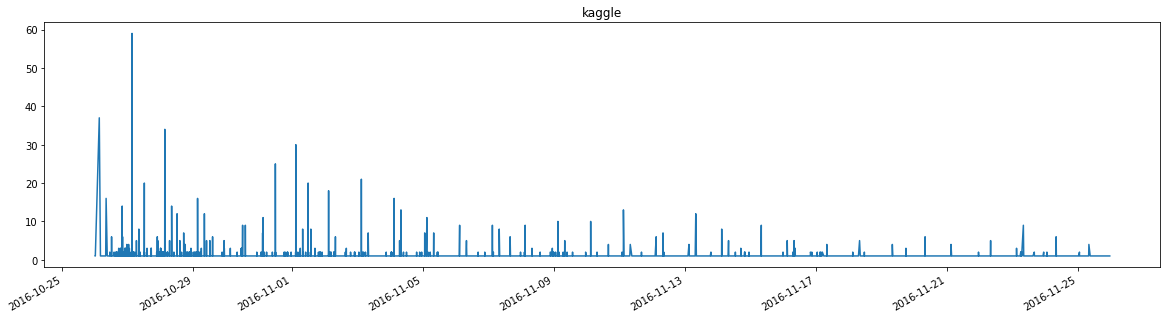

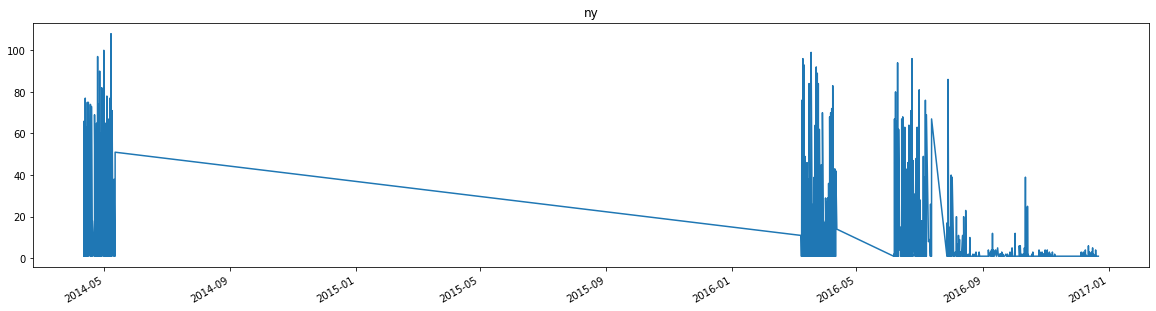

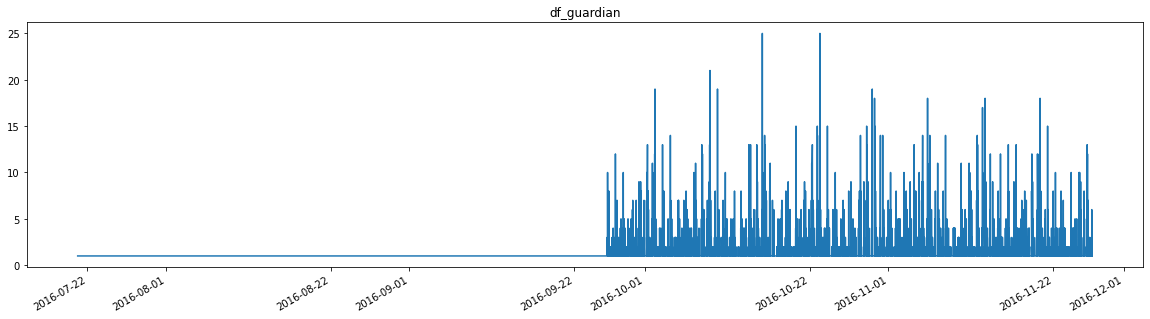

In [35]:
for source in combined_csv['source'].unique():
  current_df = combined_csv[combined_csv['source']==source]
  current_df['date'].value_counts().plot(title=source, figsize=(20, 5))
  plt.show()

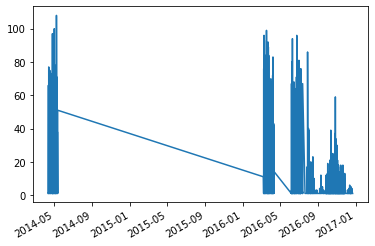

In [21]:
combined_csv['date'].value_counts().plot()

In [0]:
path_data_tokenized_sample = Path(f"{ROOT_PATH_DATA}combined_data_tokenized_sample.csv")
combined_csv.sample(frac=0.7,random_state=1).to_csv(path_data_tokenized_sample, index=False)

In [0]:
combined_csv = pd.read_csv(Path(f"{ROOT_PATH_DATA}combined_data_tokenized.csv"))
path_data_tokenized_shuffle = Path(f"{ROOT_PATH_DATA}combined_data_tokenized_shuffled.csv")
combined_csv.sample(frac=1,random_state=1).to_csv(path_data_tokenized_shuffle, index=False)

In [0]:
path_data_tokenized_balanced = Path(f"{ROOT_PATH_DATA}combined_data_tokenized_balanced.csv")
pd.concat([combined_csv[combined_csv['label']==0].sample(frac=0.5),combined_csv[combined_csv['label']==1]]).to_csv(path_data_tokenized_balanced, index=False)